In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import random 
import json

from matplotlib import pyplot as plt
from scipy.stats import ks_2samp

from src.utils import set_random_seeds

In [2]:
%matplotlib inline

In [3]:
set_random_seeds(65)

# Compute Wasserstein distance
## Experiment - Wasserstein distance captures total daset bias
### CelebA

In [4]:
# paths 
attributes = ["Wearing_Necktie", "Eyeglasses", "Wearing_Hat", "Smiling"]

celebA_csv = "../data/celeba/list_attr_celeba.csv"
uniform_csv = "../data/celeba/experiment1_uniform_sample.csv"
biased_csvs = dict()
dataframes = dict()
for attr in attributes:
    biased_csvs[attr] = ["../data/celeba/experiment1_biased_sample_{}_{}.csv".format(attr, n) for n in [10,30,60,90]]
    dataframes[attr] = [pd.read_csv(biased_csvs[attr][i]) for i in range(4)]

In [5]:
df = pd.read_csv(uniform_csv)

print("Percentage of attributes in the original CelebA dataset:\n")
for attr in attributes:
    print(attr, 100*len(df[df[attr]==1])/len(df))

Percentage of attributes in the original CelebA dataset:

Wearing_Necktie 7.2
Eyeglasses 6.7444444444444445
Wearing_Hat 4.477777777777778
Smiling 47.355555555555554


In [6]:
# read datatframe of the uniform sample
unif_df = pd.read_csv(uniform_csv)

In [7]:
# read results of the computation of Wasserstein distance stored in a .tsv
wasserstein_df = pd.read_csv("../results/experiment1/wasserstein.tsv", sep= "\t", header=None)
wasserstein_df.columns = ["X", "Y", "features", "wasserstein"]

wasserstein_df.head()

,X,Y,features,wasserstein
0,../data/celeba/experiment1_biased_sample_Weari...,../data/celeba/experiment1_uniform_sample.csv,resnet18,2.894086
1,../data/celeba/experiment1_biased_sample_Weari...,../data/celeba/experiment1_uniform_sample.csv,resnet18,7.785245
2,../data/celeba/experiment1_biased_sample_Weari...,../data/celeba/experiment1_uniform_sample.csv,resnet18,18.817941
3,../data/celeba/experiment1_biased_sample_Weari...,../data/celeba/experiment1_uniform_sample.csv,resnet18,34.127332
4,../data/celeba/experiment1_biased_sample_Weari...,../data/celeba/experiment1_uniform_sample.csv,resnet18,34.127332


In [8]:
def extract_attribute(file, attributes):
    """
    Utility function to extract the attributes 
    from a file name. 
    """
    for attr in attributes:
        if attr in file:
            return attr

# extract the attribute name from the file name stored in the column "X"
wasserstein_df["attr"] = wasserstein_df["X"].apply(lambda x: extract_attribute(x, attributes))
wasserstein_df.drop_duplicates(inplace=True)

wasserstein_df.head()

,X,Y,features,wasserstein,attr
0,../data/celeba/experiment1_biased_sample_Weari...,../data/celeba/experiment1_uniform_sample.csv,resnet18,2.894086,Wearing_Hat
1,../data/celeba/experiment1_biased_sample_Weari...,../data/celeba/experiment1_uniform_sample.csv,resnet18,7.785245,Wearing_Hat
2,../data/celeba/experiment1_biased_sample_Weari...,../data/celeba/experiment1_uniform_sample.csv,resnet18,18.817941,Wearing_Hat
3,../data/celeba/experiment1_biased_sample_Weari...,../data/celeba/experiment1_uniform_sample.csv,resnet18,34.127332,Wearing_Hat
5,../data/celeba/experiment1_biased_sample_Weari...,../data/celeba/experiment1_uniform_sample.csv,resnet18,2.647499,Wearing_Necktie


In [9]:
wasserstein = {attr: list(wasserstein_df[wasserstein_df["attr"] == attr].wasserstein)\
               for attr in attributes}

print("Results of the computation of the Wasserstein distance:\n")
wasserstein

Results of the computation of the Wasserstein distance:



{'Wearing_Necktie': [2.647498583475752,
  5.45314091406928,
  15.562698566012912,
  30.20531369103325],
 'Eyeglasses': [2.56419087897406,
  4.859932377285425,
  11.24941182115343,
  19.60691512637668],
 'Wearing_Hat': [2.8940860341390007,
  7.7852453672621,
  18.81794062889947,
  34.12733239661323],
 'Smiling': [3.415769812689888,
  2.9724747755262517,
  2.6111294665866467,
  3.211715970357254]}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


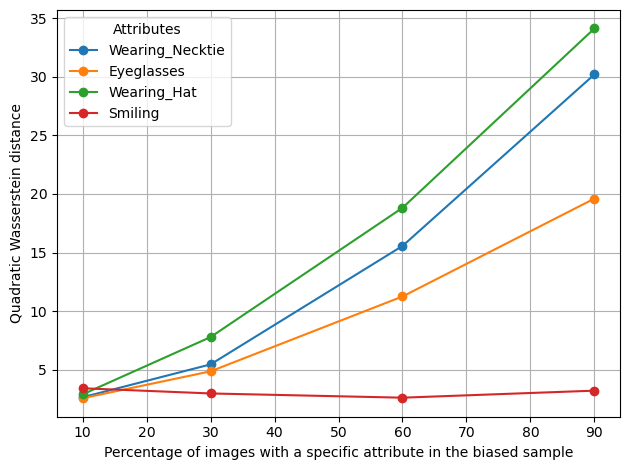

In [10]:
# plot of the results 
for i, item in enumerate(wasserstein.items()):

    attr, scores = item
    c = ["tab:blue", "tab:orange", "tab:green", "tab:red"][i]
    plt.plot([10,30,60,90], scores, "-o", c=c)

plt.title("")
plt.xlabel("Percentage of images with a specific attribute in the biased sample")
plt.ylabel("Quadratic Wasserstein distance")
plt.legend(wasserstein.keys(), title="Attributes")
plt.grid()

plt.tight_layout()
plt.savefig("../results/Experiment1/Wasserstein_distance_plot_2.eps", format="eps")
plt.show()

### Biased MNIST

In [11]:
# read results of the computation of Wasserstein distance stored in a .tsv
wasserstein_df_mnist = pd.read_csv("../results/experiment1/wasserstein_biased_mnist.tsv", sep= "\t", header=None)
wasserstein_df_mnist.columns = ["bias", "wasserstein"]

wasserstein_df_mnist

,bias,wasserstein
0,0.10,-2.991011
1,0.50,-0.969969
2,0.75,5.441967
3,0.90,15.485897
4,0.95,21.406267
5,0.99,27.803190


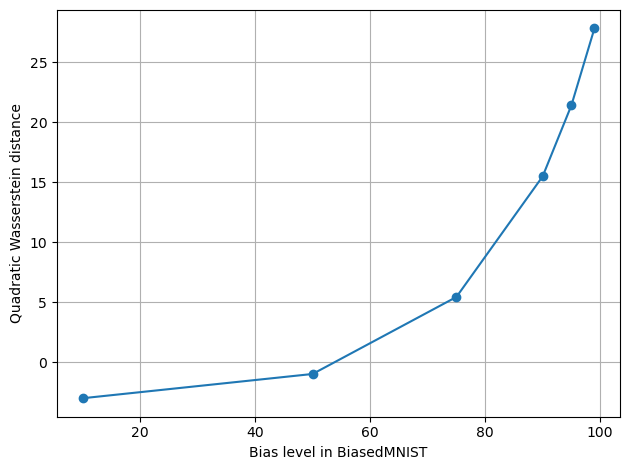

In [12]:
# plot of the results 
scores = wasserstein_df_mnist.wasserstein

plt.plot([10, 50, 75, 90, 95, 99], list(scores), "-o")

plt.title("")
plt.xlabel("Bias level in BiasedMNIST")
plt.ylabel("Quadratic Wasserstein distance")
plt.grid()

plt.tight_layout()
plt.savefig("../results/Experiment1/Wasserstein_distance_plot_mnist.eps", format="eps")
plt.show()

## Experiment - Wasserstein distance captures total daset bias
### CelebA

In [13]:
def fun(string):
    if "resnet18_/" in string:
        return "Potential"
    else:
        return string

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


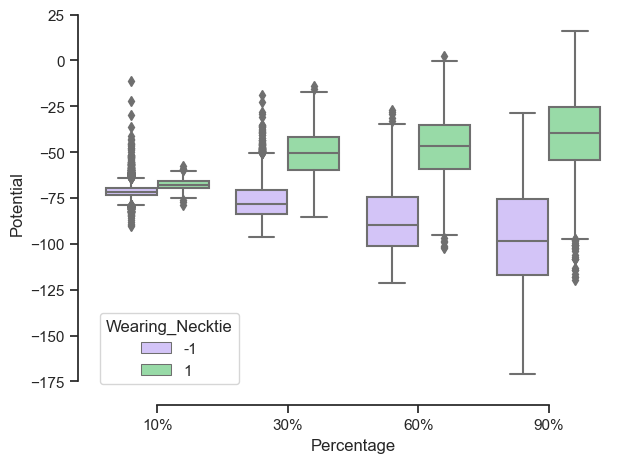

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


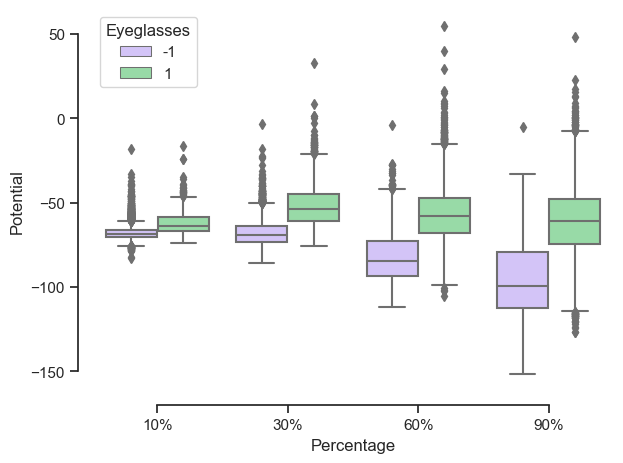

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


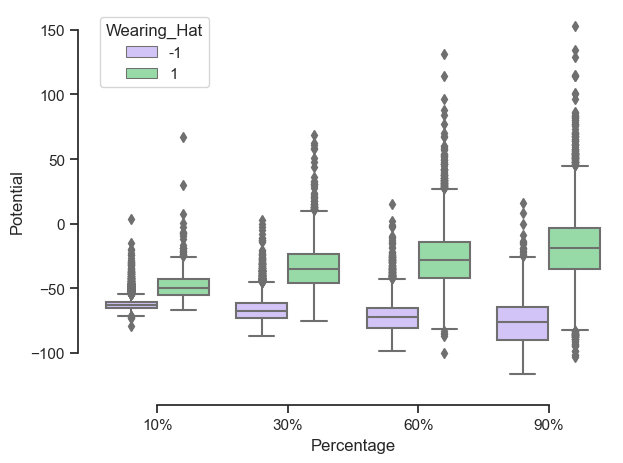

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


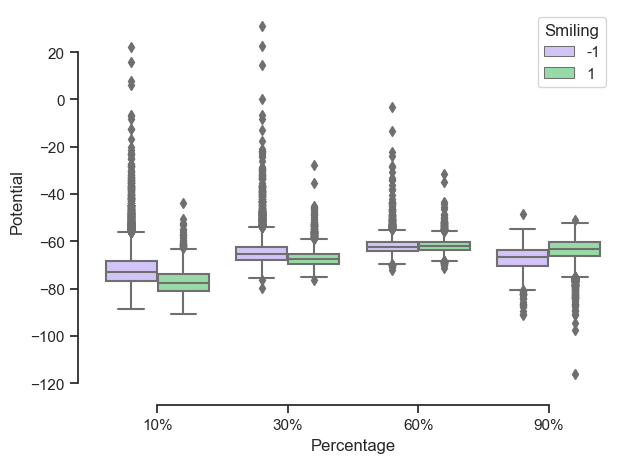

In [14]:
sns.set_theme(style="ticks", palette="pastel")

for attr in attributes:
    for i in range(4):
        n = [10, 30, 60, 90][i]
        dataframes[attr][i].rename(mapper=fun, axis=1, inplace=True)
        dataframes[attr][i]["Percentage"] = "{}%".format(n)

    data = pd.concat(dataframes[attr])

    sns.boxplot(data=data,
                x="Percentage",
                y="Potential",
                hue=attr,
                palette=["m", "g"])
    
    sns.despine(offset=10, trim=True)
    
    plt.tight_layout()
    
    plt.savefig("../results/Experiment1/{0}_Boxplot_2.eps".format(attr, n), format="eps")
    
    plt.show()

In [15]:
attributes_list = list()
perc = [10,30,60,90] * 4
stats = list()
p_val= list()

for attr in attributes:
    for i in range(4):
        df = dataframes[attr][i]
        col1 = df[df[attr] == 1].Potential
        col2 = df[df[attr] == -1].Potential
        
        test = ks_2samp(col1, col2, alternative = "greater")

        attributes_list.append(attr)
        stats.append(test.statistic)
        p_val.append(test.pvalue)

table = pd.DataFrame({"attribute" : attributes_list, "percentage" : perc, "statistic" : stats, "pvalue" : p_val})

In [16]:
print(table.set_index(["attribute", "percentage"]).to_latex())

\begin{tabular}{llrr}
\toprule
        &    &  statistic &         pvalue \\
attribute & percentage &            &                \\
\midrule
Wearing\_Necktie & 10 &   0.006667 &   9.259927e-01 \\
        & 30 &   0.000000 &   1.000000e+00 \\
        & 60 &   0.000000 &   1.000000e+00 \\
        & 90 &   0.000000 &   1.000000e+00 \\
Eyeglasses & 10 &   0.000000 &   1.000000e+00 \\
        & 30 &   0.000000 &   1.000000e+00 \\
        & 60 &   0.000000 &   1.000000e+00 \\
        & 90 &   0.000000 &   1.000000e+00 \\
Wearing\_Hat & 10 &   0.000000 &   1.000000e+00 \\
        & 30 &   0.000000 &   1.000000e+00 \\
        & 60 &   0.000185 &   9.996791e-01 \\
        & 90 &   0.000000 &   1.000000e+00 \\
Smiling & 10 &   0.342963 &   1.367295e-83 \\
        & 30 &   0.250688 &  5.472845e-104 \\
        & 60 &   0.039167 &   1.276599e-03 \\
        & 90 &   0.001111 &   9.971891e-01 \\
\bottomrule
\end{tabular}



/var/folders/8p/14dt3sw51h52d_5d395588zh0000gn/T/ipykernel_86053/2333445097.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(table.set_index(["attribute", "percentage"]).to_latex())


### Biased MNIST

In [17]:
digits = np.random.choice(np.arange(10), size=4, replace=False)
digits

array([3, 2, 4, 6])

In [18]:
features = np.random.choice(["letter", "texture_ix", "letter_color_ix", "digit_position_ix"], size=4, replace=False)
features

array(['letter_color_ix', 'texture_ix', 'letter', 'digit_position_ix'],
      dtype='<U17')

In [19]:
features = ["digit_color_ix",
            "digit_position_ix",
            "digit_scale_ix",
            "letter_color_ix",
            "letter_ix",
            "texture_color_ix",
            "texture_ix"]

In [20]:
def count_features(lst, digit, feature):
    count_d = 0
    count_f = dict()
    for e in lst:
        if e["digit"] == digit:
            count_d += 1
            if e[feature] not in count_f:
                count_f[e[feature]] = 0
            else:
                count_f[e[feature]] += 1
    for key, item in count_f.items():
        count_f[key] = round(100*item/count_d,2)
    
    return sorted(count_f.items(), key = lambda x: -x[1])

In [21]:
for att in features:
    for bias in ["0.1", "0.5", "0.75", "0.9", "0.95", "0.99"]:
        print(att)
        print(bias)
        with open("../data/biased_mnist/full_{}/trainval.json".format(bias), "r") as file:
                attr_list = json.load(file)

        print(count_features(attr_list, 0, att))
        print("\n")
    

digit_color_ix
0.1
[(3, 10.5), (0, 10.23), (6, 10.23), (2, 10.21), (5, 10.13), (9, 10.08), (1, 9.84), (4, 9.66), (8, 9.64), (7, 9.3)]


digit_color_ix
0.5
[(0, 49.89), (1, 6.16), (8, 5.98), (3, 5.66), (4, 5.61), (6, 5.59), (5, 5.4), (7, 5.25), (9, 5.23), (2, 5.07)]


digit_color_ix
0.75
[(0, 74.52), (1, 3.29), (2, 3.09), (8, 2.97), (5, 2.97), (6, 2.89), (7, 2.72), (4, 2.58), (9, 2.57), (3, 2.23)]


digit_color_ix
0.9
[(0, 90.97), (8, 1.11), (4, 1.08), (5, 1.06), (2, 1.01), (1, 1.0), (6, 1.0), (9, 0.98), (7, 0.86), (3, 0.76)]


digit_color_ix
0.95
[(0, 95.19), (4, 0.59), (8, 0.59), (1, 0.56), (2, 0.56), (5, 0.52), (3, 0.47), (6, 0.46), (7, 0.46), (9, 0.44)]


digit_color_ix
0.99
[(0, 98.85), (8, 0.17), (5, 0.15), (2, 0.15), (4, 0.14), (6, 0.1), (9, 0.08), (7, 0.08), (3, 0.08), (1, 0.02)]


digit_position_ix
0.1
[(9, 10.38), (6, 10.25), (4, 10.2), (5, 10.18), (3, 10.06), (0, 9.99), (8, 9.91), (2, 9.84), (1, 9.61), (7, 9.4)]


digit_position_ix
0.5
[(0, 48.74), (3, 6.04), (6, 5.93), (5, 5

In [22]:
kp_dict = {}
tops = dict()
for att in features:
    kp_dict[att] = {}
    for bias in ["0.1", "0.5", "0.75", "0.9", "0.95", "0.99"]:
        # load .csv kantorovich potentials
        df = pd.read_csv("../results/Experiment1/KP_biased_mnist_{}.csv".format(bias))
        # load attributes json
        with open("../data/biased_mnist/full_{}/trainval.json".format(bias), "r") as file:
            attr_list = json.load(file)

        train_attr = [attr_list[i] for i in df.index]
    
        kp_dict[att][bias] = {True: list(), False: list()}
        for kp, a in zip(df.KP, train_attr):
            if a["digit"] == 4:
                kp_dict[att][bias][a[att] == 4].append(kp)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


digit_color_ix


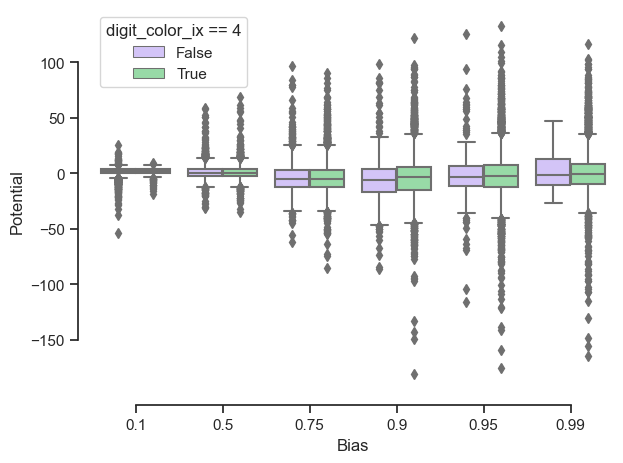

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


digit_position_ix


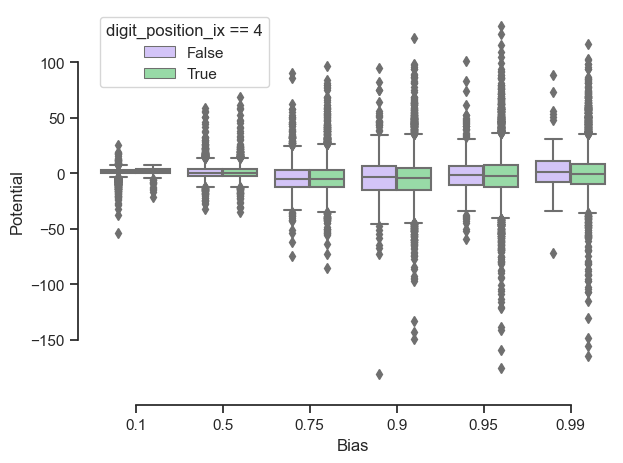

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


digit_scale_ix


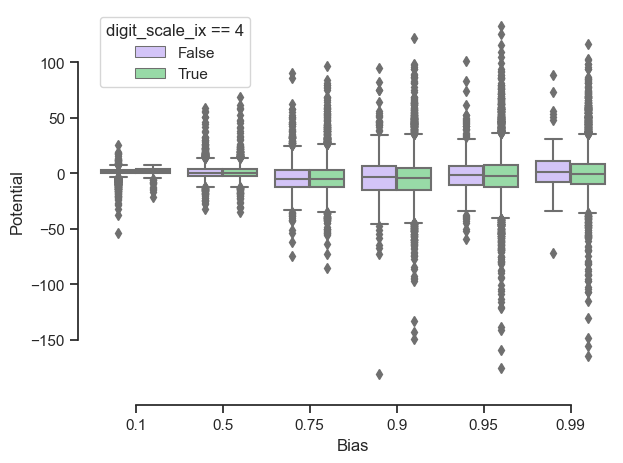

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


letter_color_ix


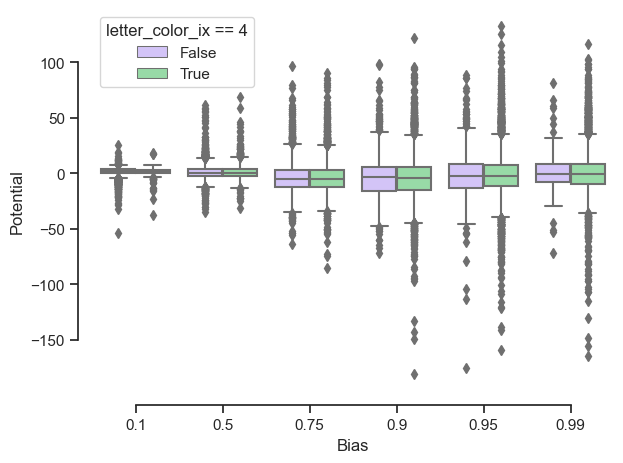

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


letter_ix


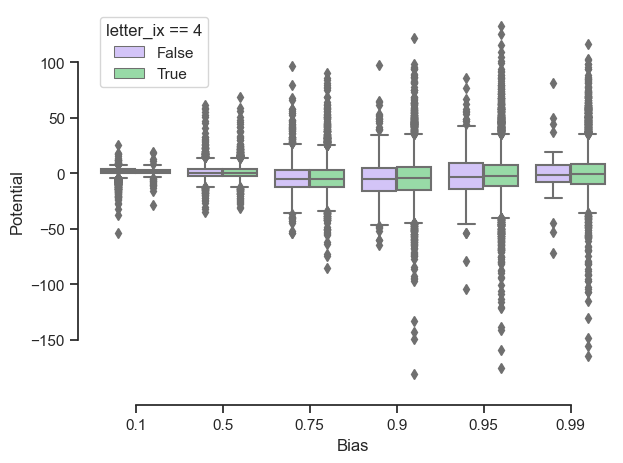

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


texture_color_ix


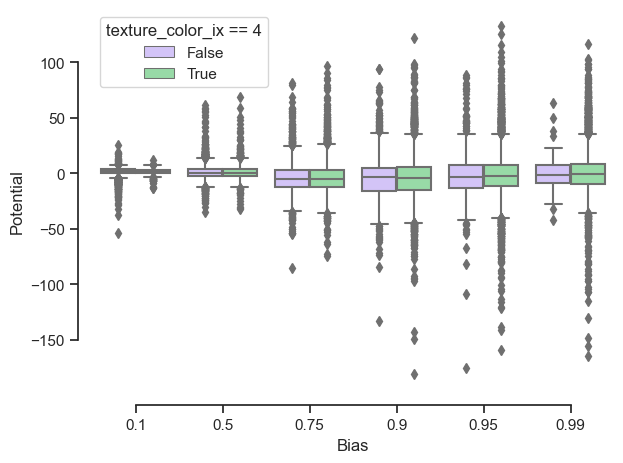

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


texture_ix


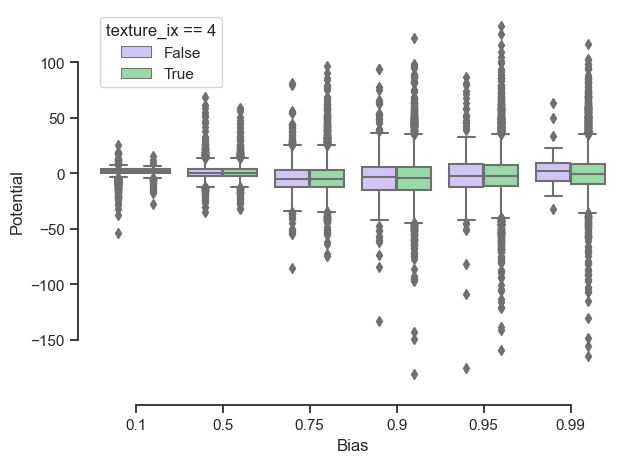

In [23]:
sns.set_theme(style="ticks", palette="pastel")
dataframes = dict()
for key, item in kp_dict.items():
    print(key)
    data = pd.DataFrame(columns=["Bias", "Potential", "{} == {}".format(key, 4)])
    i = 0
    for bias in item.keys():
        tr = list(zip([bias]*len(item[bias][True]), item[bias][True], [True]*len(item[bias][True])))
        fs = list(zip([bias]*len(item[bias][False]), item[bias][False], [False]*len(item[bias][False])))
        
        data_temp = pd.DataFrame(tr + fs, columns=["Bias", "Potential", "{} == {}".format(key, 4)])
    
        data = pd.concat([data, data_temp])
    
    dataframes[key] = data
    sns.boxplot(data=data,
                x="Bias",
                y="Potential",
                hue="{} == {}".format(key, 4),
                palette=["m", "g"])
    
    sns.despine(offset=10, trim=True)
    
    plt.tight_layout()
    plt.savefig("../results/Experiment1/biased_mnist_digit_4_{}_Boxplot.eps".format(key), format="eps")
    plt.show()


    

In [24]:
attributes_list = list()
perc = ["0.1", "0.5", "0.75", "0.9", "0.95", "0.99"]
stats = list()
p_val= list()

for att in features:
    for p in perc:
        col1 = dataframes[att][(dataframes[att]["Bias"] == p) & (dataframes[att]["{} == {}".format(att,4)] == False)].Potential
        col2 = dataframes[att][(dataframes[att]["Bias"] == p) & (dataframes[att]["{} == {}".format(att,4)] == True)].Potential
        
        test = ks_2samp(col1, col2, alternative = "greater")

        attributes_list.append(att)
        stats.append(test.statistic)
        p_val.append(test.pvalue)

table = pd.DataFrame({"attribute" : attributes_list, "percentage" : perc*len(features), "statistic" : stats, "pvalue" : p_val})

In [25]:
print(table.set_index(["attribute", "percentage"]).to_latex())

\begin{tabular}{llrr}
\toprule
           &      &  statistic &    pvalue \\
attribute & percentage &            &           \\
\midrule
digit\_color\_ix & 0.1 &   0.037617 &  0.267851 \\
           & 0.5 &   0.021525 &  0.317550 \\
           & 0.75 &   0.028237 &  0.234423 \\
           & 0.9 &   0.069114 &  0.016596 \\
           & 0.95 &   0.035209 &  0.568025 \\
           & 0.99 &   0.110749 &  0.289914 \\
digit\_position\_ix & 0.1 &   0.060361 &  0.052456 \\
           & 0.5 &   0.008610 &  0.828023 \\
           & 0.75 &   0.027001 &  0.264179 \\
           & 0.9 &   0.013224 &  0.859598 \\
           & 0.95 &   0.027774 &  0.688795 \\
           & 0.99 &   0.064081 &  0.649281 \\
digit\_scale\_ix & 0.1 &   0.060361 &  0.052456 \\
           & 0.5 &   0.008610 &  0.828023 \\
           & 0.75 &   0.027001 &  0.264179 \\
           & 0.9 &   0.013224 &  0.859598 \\
           & 0.95 &   0.027774 &  0.688795 \\
           & 0.99 &   0.064081 &  0.649281 \\
letter\_color\_ix & 0.1

/var/folders/8p/14dt3sw51h52d_5d395588zh0000gn/T/ipykernel_86053/2333445097.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(table.set_index(["attribute", "percentage"]).to_latex())
